# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')

#closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-04-20,2.5,call,AAPL180420C00002500,...,2018-04-13 20:00:05,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
2018-04-20,2.5,put,AAPL180420P00002500,...,2018-04-13 20:00:05,2017-09-23 03:55:28,"{'contractSymbol': 'AAPL180420P00002500', 'str..."
2018-10-19,2.5,call,AAPL181019C00002500,...,2018-04-13 20:00:05,2018-03-28 13:24:58,"{'contractSymbol': 'AAPL181019C00002500', 'str..."
2018-10-19,2.5,put,AAPL181019P00002500,...,2018-04-13 20:00:05,2018-04-07 03:57:30,"{'contractSymbol': 'AAPL181019P00002500', 'str..."
2018-04-20,5.0,call,AAPL180420C00005000,...,2018-04-13 20:00:05,2018-01-23 19:15:39,"{'contractSymbol': 'AAPL180420C00005000', 'str..."
...,...,...,...,...,...,...,...
2018-07-20,325.0,put,AAPL180720P00325000,...,2018-04-13 20:00:05,2018-01-13 04:45:00,"{'contractSymbol': 'AAPL180720P00325000', 'str..."
2018-10-19,335.0,call,AAPL181019C00335000,...,2018-04-13 20:00:05,2018-04-14 03:49:46,"{'contractSymbol': 'AAPL181019C00335000', 'str..."
2018-07-20,340.0,call,AAPL180720C00340000,...,2018-04-13 20:00:05,2018-01-26 19:12:28,"{'contractSymbol': 'AAPL180720C00340000', 'str..."


In [3]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2018-06-15') & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
43,70.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-04-05 16:34:31,"{'contractSymbol': 'AAPL180615P00070000', 'str..."
51,75.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-04-09 19:06:31,"{'contractSymbol': 'AAPL180615P00075000', 'str..."
63,80.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-04-13 17:18:01,"{'contractSymbol': 'AAPL180615P00080000', 'str..."
76,85.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-03-29 16:43:52,"{'contractSymbol': 'AAPL180615P00085000', 'str..."
92,90.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-04-13 17:45:26,"{'contractSymbol': 'AAPL180615P00090000', 'str..."
...,...,...,...,...,...,...,...
935,220.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-02-28 16:07:16,"{'contractSymbol': 'AAPL180615P00220000', 'str..."
956,225.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-04-05 14:03:27,"{'contractSymbol': 'AAPL180615P00225000', 'str..."
972,230.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-02-12 18:36:55,"{'contractSymbol': 'AAPL180615P00230000', 'str..."
1003,240.0,2018-06-15,put,...,2018-04-13 20:00:05,2018-02-17 04:46:07,"{'contractSymbol': 'AAPL180615P00240000', 'str..."


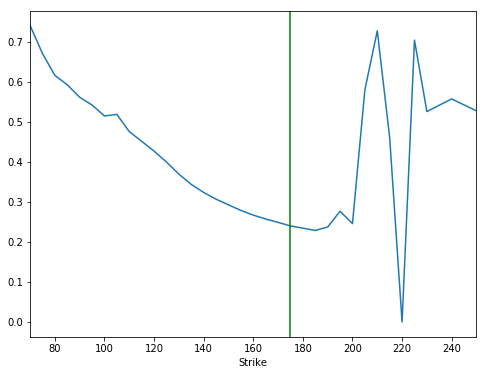

In [4]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g');

In [5]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')
#     closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
#     index = pd.to_datetime(closes.loc['date',:,tickers[0]].values)
#     closes.set_axis(index, axis=1, inplace=True)
#     closes = closes.loc['adjclose']#.sort_index().dropna()
#     closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
#     closes.index.name = 'Date'
    return closes.loc['Adj Close'].dropna()

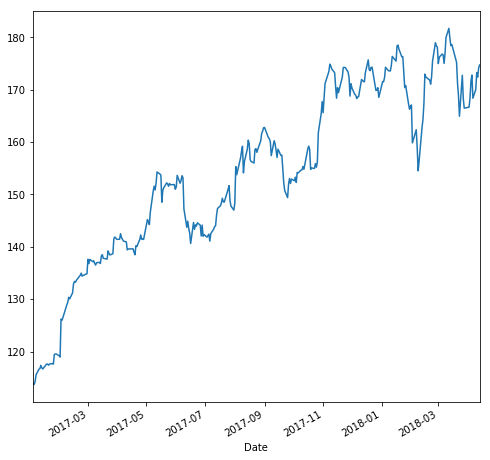

In [6]:
# ticker = ['AAPL']
ticker = ['AAPL','MSFT', 'AEROMEX.MX']
start_date = '2017-01-01'

closes = get_historical_closes(ticker, start_date)
closes_appl = closes.loc[:,'AAPL']
# assets_mx = get_historical_closes(ticker_mx, start_date_mx)
# closes_appl = get_historical_closes(['AAPL'], '2017-01-01')
# closes_appl.plot(figsize=(8,8))
closes_appl.plot(figsize=(8,8));

In [7]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

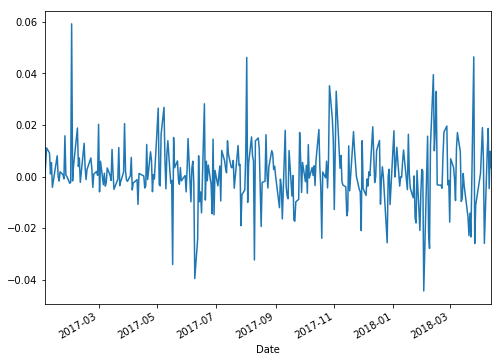

In [8]:
ret_aapl = calc_daily_ret(closes_appl)
ret_aapl.plot(figsize=(8,6));

In [9]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-04-20,2.5,call,AAPL180420C00002500,...,2018-04-13 20:00:05,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
2018-04-20,190.0,put,AAPL180420P00190000,...,2018-04-13 20:00:05,2018-04-10 19:20:12,"{'contractSymbol': 'AAPL180420P00190000', 'str..."
2018-04-20,190.0,call,AAPL180420C00190000,...,2018-04-13 20:00:05,2018-04-13 19:58:20,"{'contractSymbol': 'AAPL180420C00190000', 'str..."
2018-04-20,187.5,put,AAPL180420P00187500,...,2018-04-13 20:00:05,2018-04-12 17:25:01,"{'contractSymbol': 'AAPL180420P00187500', 'str..."
2018-04-20,187.5,call,AAPL180420C00187500,...,2018-04-13 20:00:05,2018-04-13 19:55:55,"{'contractSymbol': 'AAPL180420C00187500', 'str..."
...,...,...,...,...,...,...,...
2020-06-19,250.0,call,AAPL200619C00250000,...,2018-04-13 20:00:05,2018-04-12 15:08:45,"{'contractSymbol': 'AAPL200619C00250000', 'str..."
2020-06-19,185.0,put,AAPL200619P00185000,...,2018-04-13 20:00:05,2018-04-12 18:01:47,"{'contractSymbol': 'AAPL200619P00185000', 'str..."
2020-06-19,95.0,put,AAPL200619P00095000,...,2018-04-13 20:00:05,2018-03-27 18:53:05,"{'contractSymbol': 'AAPL200619P00095000', 'str..."


In [10]:
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==180) & (aapl_opt.Expiry=='2018-11-16')]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
691,180.0,2018-11-16,put,...,2018-04-13 20:00:05,2018-04-13 15:25:35,"{'contractSymbol': 'AAPL181116P00180000', 'str..."


In [11]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()
mu, sigma

(0.0013774318197553345, 0.012427464759306239)

In [12]:
# Tasa de bonos de 1 yr de fecha 04/11/18 -> 2.09%
r = 0.0209/360 # Tasa diaria

In [13]:
ndays = 218
nscen = 10
dates = pd.date_range('2018-04-12', periods = ndays)
dates

DatetimeIndex(['2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15',
               '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
               '2018-04-20', '2018-04-21',
               ...
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15'],
              dtype='datetime64[ns]', length=218, freq='D')

In [14]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2018-04-12,-1.536e-03,0.030,-0.001,...,-0.013,0.009,0.007
2018-04-13,-9.569e-03,0.003,0.010,...,0.012,0.002,-0.004
2018-04-14,-1.495e-02,0.012,0.020,...,-0.024,-0.005,0.014
2018-04-15,-1.043e-02,0.022,-0.003,...,-0.018,-0.007,0.007
2018-04-16,7.787e-03,0.005,-0.016,...,-0.006,0.001,-0.011
...,...,...,...,...,...,...,...
2018-11-11,-9.660e-04,0.014,0.023,...,-0.010,0.003,0.012
2018-11-12,-1.346e-02,0.004,0.012,...,0.013,-0.005,-0.002
2018-11-13,-1.170e-02,0.018,0.020,...,0.026,0.005,-0.007
2018-11-14,2.589e-03,-0.011,0.019,...,0.005,0.023,0.010


In [15]:
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-04-12,174.462,180.029,174.552,...,172.462,176.374,175.910
2018-04-13,172.800,180.483,176.256,...,174.559,176.757,175.149
2018-04-14,170.236,182.679,179.840,...,170.392,175.917,177.555
2018-04-15,168.470,186.768,179.256,...,167.291,174.620,178.721
2018-04-16,169.788,187.793,176.498,...,166.313,174.861,176.851
...,...,...,...,...,...,...,...
2018-11-11,178.512,225.720,221.522,...,189.860,163.618,199.269
2018-11-12,176.125,226.557,224.214,...,192.431,162.761,198.921
2018-11-13,174.076,230.618,228.833,...,197.516,163.652,197.561
2018-11-14,174.528,228.011,233.242,...,198.580,167.394,199.604


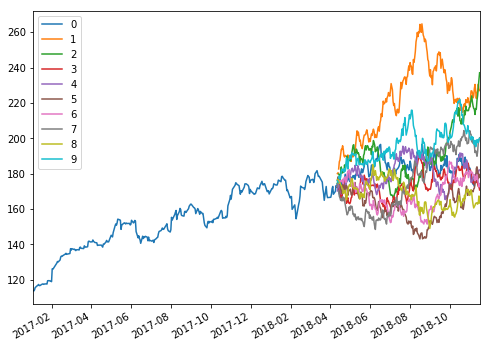

In [16]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_appl,sim_closes]).plot(figsize=(8,6));

In [17]:
K=180  # strike price
ndays = 218 
nscen = 100000
dates = pd.date_range('2018-04-12', periods = ndays)
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

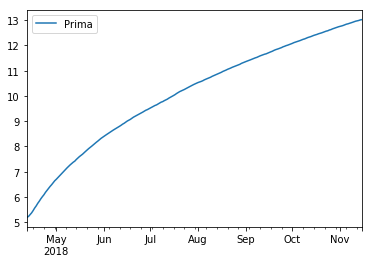

In [18]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [19]:
put.iloc[-1]

Prima    13.024
Name: 2018-11-15 00:00:00, dtype: float64

In [21]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)



(12.817927401523821, 13.230110089432213)
(12.817927401523821, 13.230110089432213)


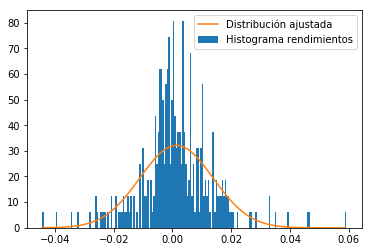

In [22]:
ren = calc_daily_ret(closes_appl) # rendimientos 
y,x,discar = plt.hist(ren,200,normed=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

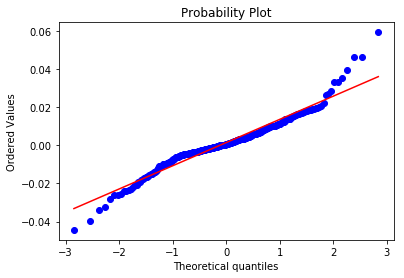

In [23]:
st.probplot(ren, dist='norm', plot=plt);

In [24]:
K=180
ndays = 218
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-02-15',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())

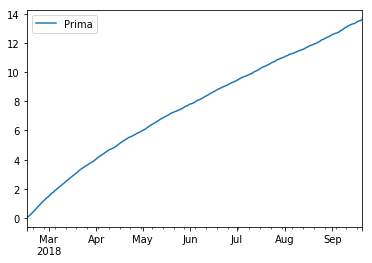

In [25]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [26]:
put_hist.iloc[-1]

Prima    13.597
Name: 2018-09-20 00:00:00, dtype: float64

In [28]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)



(12.931797038837843, 14.262710174989017)
(12.931797038837843, 14.262710174989017)
